In [1]:
import pandas as pd

df = pd.read_csv (r'C:\Users\Dell\Downloads\Project.csv')


In [2]:
df.iloc[200:300]

,S. No.,Date,Region,Confirmed Cases,Cured/Discharged,Death
200,201,27-09-2020,India,5992532,4941627.0,94503.0
201,202,28-09-2020,India,6074702,5016520.0,95542.0
202,203,29-09-2020,India,6145291,5101397.0,96318.0
203,204,30-09-2020,India,6225763,5187825.0,97497.0
204,205,01-10-2020,India,6312584,5273201.0,98678.0
...,...,...,...,...,...,...
295,296,03-01-2021,India,10323965,9927310.0,149435.0
296,297,04-01-2021,India,10340469,9946867.0,149649.0
297,298,05-01-2021,India,10356844,9975958.0,149850.0
298,299,06-01-2021,India,10374932,9997272.0,150114.0


In [3]:
df.drop(['S. No.'], axis=1, inplace=True)

In [4]:
df_filtered = df[df['Date']!='01-01-1970']


In [5]:
df_filtered

,Date,Region,Confirmed Cases,Cured/Discharged,Death
1,12-03-2020,India,74,3.0,0.0
2,13-03-2020,India,75,3.0,1.0
3,14-03-2020,India,84,10.0,2.0
4,15-03-2020,India,107,10.0,2.0
5,16-03-2020,India,114,13.0,2.0
...,...,...,...,...,...
22832,27-11-2021,World,260126535,NaN,5190127.0
22833,28-11-2021,World,260572276,NaN,5195577.0
22834,29-11-2021,World,261037014,NaN,5201733.0
22835,30-11-2021,World,261435768,NaN,5207634.0


df_filtered['Active Cases'] = df_filtered.apply(lambda row: row.Confirmed Cases - row.Cured/Discharged - row.Death, axis = 1)



In [6]:
df_filtered['Active Cases'] = df_filtered['Confirmed Cases'] - df_filtered['Cured/Discharged'] - df_filtered['Death']


<ipython-input-6-08dfe2ec7002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Active Cases'] = df_filtered['Confirmed Cases'] - df_filtered['Cured/Discharged'] - df_filtered['Death']


In [7]:
df_filtered

,Date,Region,Confirmed Cases,Cured/Discharged,Death,Active Cases
1,12-03-2020,India,74,3.0,0.0,71.0
2,13-03-2020,India,75,3.0,1.0,71.0
3,14-03-2020,India,84,10.0,2.0,72.0
4,15-03-2020,India,107,10.0,2.0,95.0
5,16-03-2020,India,114,13.0,2.0,99.0
...,...,...,...,...,...,...
22832,27-11-2021,World,260126535,NaN,5190127.0,NaN
22833,28-11-2021,World,260572276,NaN,5195577.0,NaN
22834,29-11-2021,World,261037014,NaN,5201733.0,NaN
22835,30-11-2021,World,261435768,NaN,5207634.0,NaN


df_filtered['Recovery Rate'] = (df_filtered['Cured/Discharged']*100) /  df_filtered['Confirmed Cases'] 

df_filtered

df_filtered['Mortality Rate'] = (df_filtered['Death']*100) /  df_filtered['Confirmed Cases'] 

df_filtered

df_filtered.iloc[200:300]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

table = pd.pivot_table(data=df_filtered,index=['Region'])
table

In [9]:
table = pd.pivot_table(df_filtered,index=['Region'],aggfunc={'Confirmed Cases':np.max, 'Cured/Discharged':np.max, 'Death':np.max})
table

,Confirmed Cases,Cured/Discharged,Death
Region,,,
Andaman and Nicobar Islands,7683,7549.0,129.0
Andhra Pradesh,2073093,2056501.0,14443.0
Arunachal Pradesh,55279,54964.0,280.0
Assam,617039,608319.0,6108.0
Bihar,726225,716530.0,9663.0
Chandigarh,65471,64585.0,820.0
Chhattisgarh,1006833,992924.0,13593.0
Dadra and Nagar Haveli and Daman and Diu,10683,10678.0,4.0
Delhi,1440973,1415589.0,25098.0


table.round(6)

In [10]:
pd.options.display.float_format = '{:.2f}'.format


In [11]:
table

,Confirmed Cases,Cured/Discharged,Death
Region,,,
Andaman and Nicobar Islands,7683,7549.00,129.00
Andhra Pradesh,2073093,2056501.00,14443.00
Arunachal Pradesh,55279,54964.00,280.00
Assam,617039,608319.00,6108.00
Bihar,726225,716530.00,9663.00
Chandigarh,65471,64585.00,820.00
Chhattisgarh,1006833,992924.00,13593.00
Dadra and Nagar Haveli and Daman and Diu,10683,10678.00,4.00
Delhi,1440973,1415589.00,25098.00


In [12]:
table['Recovery Rate'] = (table['Cured/Discharged']*100) /  table['Confirmed Cases'] 

In [13]:
table['Mortality Rate'] = (table['Death']*100) /  table['Confirmed Cases'] 


In [37]:
table.reset_index()

,Region,Confirmed Cases,Cured/Discharged,Death,Recovery Rate,Mortality Rate
0,Andaman and Nicobar Islands,7683,7549.00,129.00,98.26,1.68
1,Andhra Pradesh,2073093,2056501.00,14443.00,99.20,0.70
2,Arunachal Pradesh,55279,54964.00,280.00,99.43,0.51
3,Assam,617039,608319.00,6108.00,98.59,0.99
4,Bihar,726225,716530.00,9663.00,98.67,1.33
5,Chandigarh,65471,64585.00,820.00,98.65,1.25
6,Chhattisgarh,1006833,992924.00,13593.00,98.62,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10683,10678.00,4.00,99.95,0.04
8,Delhi,1440973,1415589.00,25098.00,98.24,1.74
9,Goa,178990,175279.00,3384.00,97.93,1.89


pd.reset_option('^display.', silent=True)

table

In [15]:
table.style.background_gradient(axis=1)

,Confirmed Cases,Cured/Discharged,Death,Recovery Rate,Mortality Rate
Region,,,,,
Andaman and Nicobar Islands,7683,7549.000000,129.000000,98.255890,1.679032
Andhra Pradesh,2073093,2056501.000000,14443.000000,99.199650,0.696688
Arunachal Pradesh,55279,54964.000000,280.000000,99.430163,0.506521
Assam,617039,608319.000000,6108.000000,98.586799,0.989889
Bihar,726225,716530.000000,9663.000000,98.665014,1.330579
Chandigarh,65471,64585.000000,820.000000,98.646729,1.252463
Chhattisgarh,1006833,992924.000000,13593.000000,98.618540,1.350075
Dadra and Nagar Haveli and Daman and Diu,10683,10678.000000,4.000000,99.953197,0.037443
Delhi,1440973,1415589.000000,25098.000000,98.238413,1.741740


In [16]:
table.style.background_gradient(axis=0)

,Confirmed Cases,Cured/Discharged,Death,Recovery Rate,Mortality Rate
Region,,,,,
Andaman and Nicobar Islands,7683,7549.000000,129.000000,98.255890,1.679032
Andhra Pradesh,2073093,2056501.000000,14443.000000,99.199650,0.696688
Arunachal Pradesh,55279,54964.000000,280.000000,99.430163,0.506521
Assam,617039,608319.000000,6108.000000,98.586799,0.989889
Bihar,726225,716530.000000,9663.000000,98.665014,1.330579
Chandigarh,65471,64585.000000,820.000000,98.646729,1.252463
Chhattisgarh,1006833,992924.000000,13593.000000,98.618540,1.350075
Dadra and Nagar Haveli and Daman and Diu,10683,10678.000000,4.000000,99.953197,0.037443
Delhi,1440973,1415589.000000,25098.000000,98.238413,1.741740


In [17]:
df_filtered.groupby(by='Region').max()['Active Cases']

Region
Andaman and Nicobar Islands                   1154.00
Andhra Pradesh                              211554.00
Arunachal Pradesh                             4384.00
Assam                                        56295.00
Bihar                                       115152.00
Chandigarh                                    8653.00
Chhattisgarh                                131245.00
Dadra and Nagar Haveli and Daman and Diu      2081.00
Delhi                                       103424.00
Goa                                          32953.00
Gujarat                                     148297.00
Haryana                                     116867.00
Himachal Pradesh                             40008.00
India                                      3745237.00
Jammu and Kashmir                            52848.00
Jharkhand                                    61195.00
Karnataka                                   605515.00
Kerala                                      445692.00
Ladakh               

In [18]:
df_final= df_filtered.groupby(by='Region').max()[['Active Cases', 'Date']].sort_values(by='Active Cases', ascending=False).iloc[:11]


file= df_final['Region'].isnotin('India')

SyntaxError: invalid syntax (<ipython-input-31-6ccd3335faa2>, line 1)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
 
# creating the bar plot
plt.barplot(data= data_filtered 'Active Cases[0:10]', color ='maroon',
        width = 2)
 
plt.xlabel("States/Union Terretories")
plt.ylabel("No of Active Cases")
plt.title("Top 10 states with most active cases")
plt.show()


SyntaxError: invalid syntax (<ipython-input-32-0c3d03fd94ac>, line 6)

In [20]:
import seaborn as sns


In [22]:
df_final

,Region,Active Cases,Date
0,India,3745237.00,31-12-2020
1,Maharashtra,701614.00,31-12-2020
2,Karnataka,605515.00,31-12-2020
3,Kerala,445692.00,31-12-2020
4,Tamil Nadu,313048.00,31-12-2020
5,Uttar Pradesh,310783.00,31-12-2020
6,Rajasthan,211889.00,31-12-2020
7,Andhra Pradesh,211554.00,31-12-2020
8,Gujarat,148297.00,31-12-2020
9,West Bengal,132181.00,31-12-2020


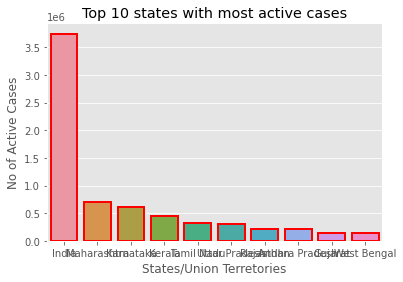

In [26]:
import numpy as np
import matplotlib.pyplot as plt

 
# creating the bar plot
ax= sns.barplot(data= df_final.iloc[:10], x= 'Region', y= 'Active Cases', linewidth=2, edgecolor='red')
        
plt.xlabel("States/Union Terretories")
plt.ylabel("No of Active Cases")
plt.title("Top 10 states with most active cases")
plt.show()
